In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
# Load face data
faces = np.genfromtxt('hw2-bundle/hw2-bundle/pca/data/faces.csv', delimiter=',')

### Get values of $\lambda_1$, $\lambda_2$, $\lambda_5$, $\lambda_{10}$, $\lambda_{50}$ and $\sum_i \lambda_i$
Hint: Documentation for [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [4]:
# Your code here
n, d = faces.shape
sample_cov_mat = faces.T @ faces / n
eigvals, eigvecs = np.linalg.eigh(sample_cov_mat)
eigvals = eigvals[-1*(np.arange(len(eigvals))+1)]
eigvecs = eigvecs[:, -1*(np.arange(len(eigvals))+1)]

In [5]:
lam_1 = eigvals[0]
lam_2 = eigvals[1]
lam_10 = eigvals[9]
lam_30 = eigvals[29]
lam_50 = eigvals[49]
print(f"The 1st eigenvalue is {lam_1}\n")
print(f"The 2nd eigenvalue is {lam_2}\n")
print(f"The 10th eigenvalue is {lam_10}\n")
print(f"The 30th eigenvalue is {lam_30}\n")
print(f"The 50th eigenvalue is {lam_50}\n")

The 1st eigenvalue is 781.8126992600014

The 2nd eigenvalue is 161.1515749673269

The 10th eigenvalue is 3.339586754887816

The 30th eigenvalue is 0.8090877903777195

The 50th eigenvalue is 0.3895777395181465



In [6]:
eigvals_sum_1 = eigvals.sum()
eigvals_sum_2 = np.trace(sample_cov_mat)
print(f"Naively summing the eigenvalues gave {eigvals_sum_1}\n")
print(f"Using the trace gave {eigvals_sum_2}\n")
print(f"Are two methods agree with each other: {np.isclose(eigvals_sum_1, eigvals_sum_2)}")

Naively summing the eigenvalues gave 1084.2074349947652

Using the trace gave 1084.2074349947673

Are two methods agree with each other: True


## Plot Reconstruction Error vs k
Hint: refer to the documentation for [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

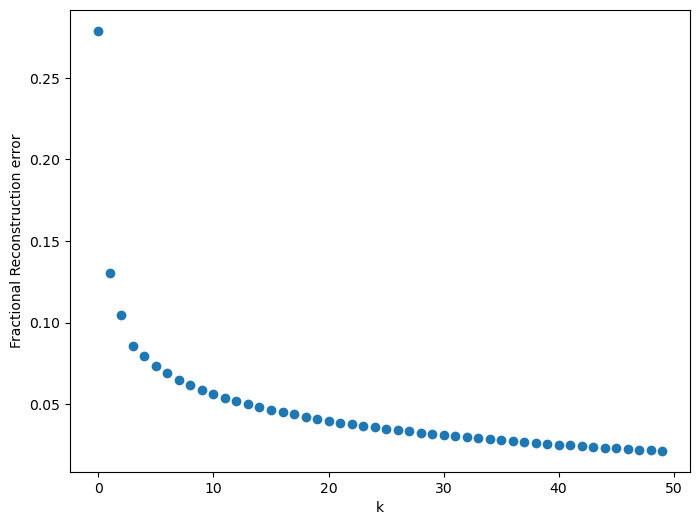

In [7]:
# Your code here
frac_recon_err = 1 - np.cumsum(eigvals[:50]) / eigvals_sum_2

fig, ax = plt.subplots()
ax.scatter(np.arange(50), frac_recon_err)
ax.set_xlabel("k")
ax.set_ylabel("Fractional Reconstruction error")
plt.show()

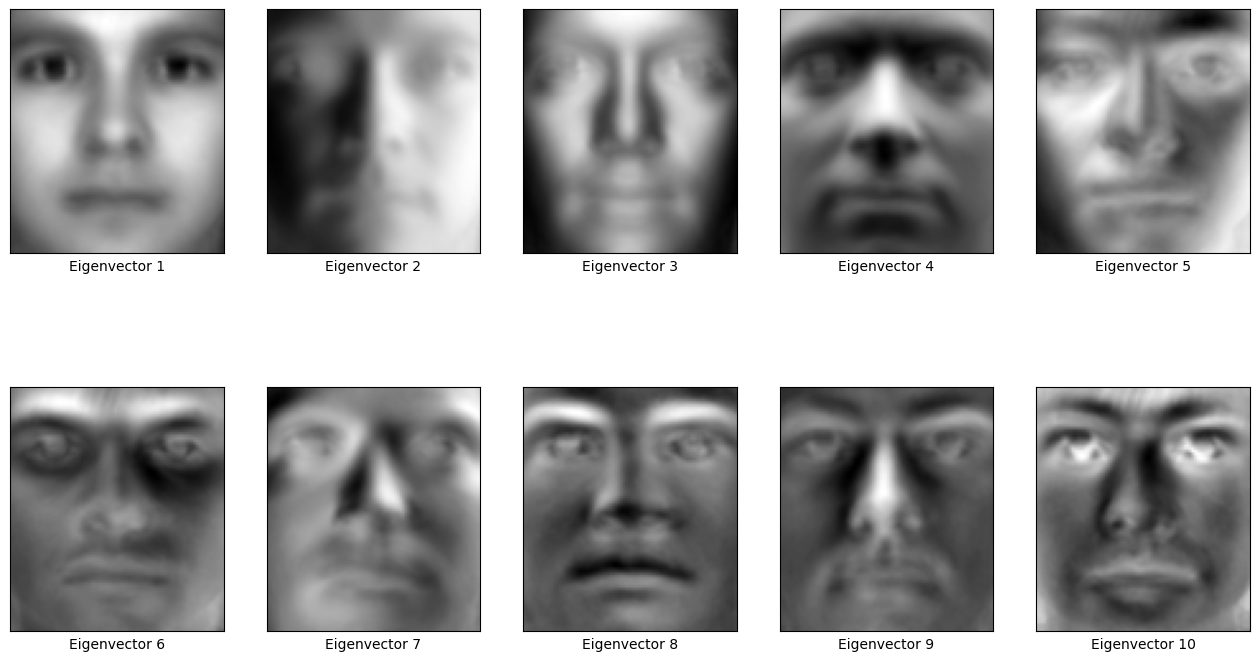

In [8]:
# Plot eigenvectors
fig, axs = plt.subplots(2,5, figsize=(16,9))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xlabel('Eigenvector '+str(i+1))
    # Your code here
    plt.imshow(eigvecs[:,i].reshape((84, 96)).transpose(), cmap='gray')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

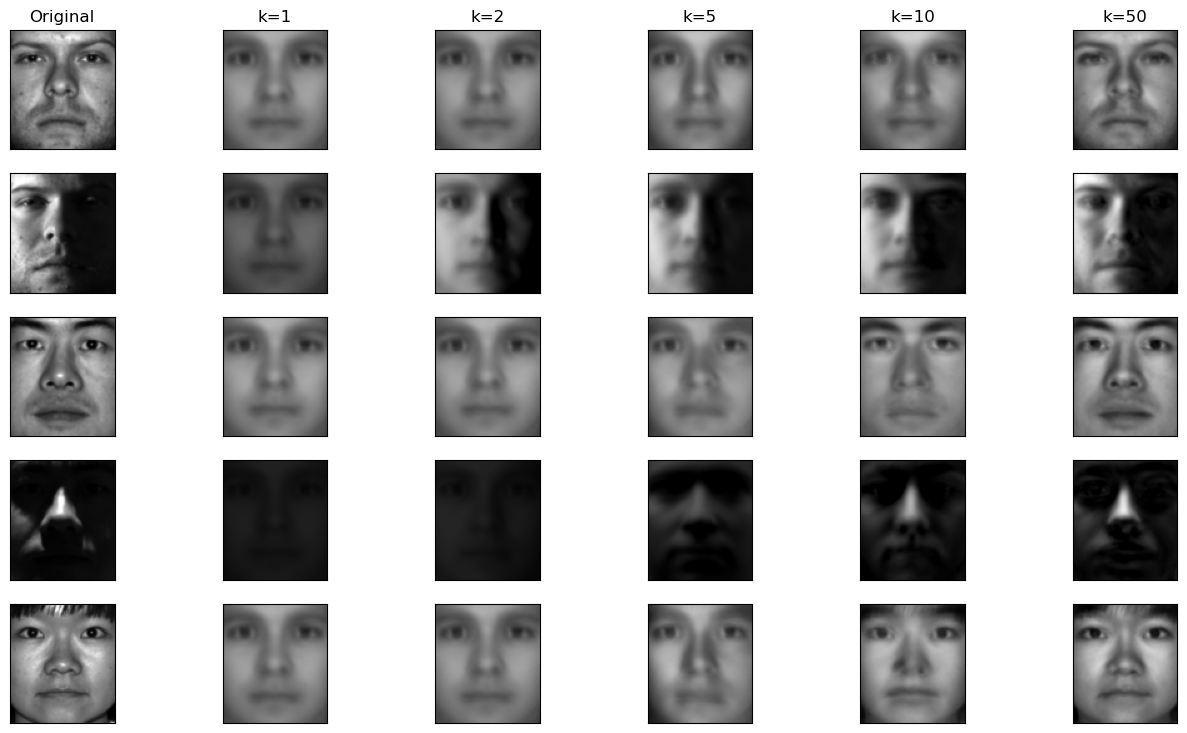

In [10]:
#d1
fig, axs = plt.subplots(5,6, figsize=(16,9))
axs[0, 0].set_title('Original')
axs[0, 1].set_title('k=1')
axs[0, 2].set_title('k=2')
axs[0, 3].set_title('k=5')
axs[0, 4].set_title('k=10')
axs[0, 5].set_title('k=50')

recon_data = faces

num_plots_made = 1
for image in [0,23,64,67,256]:
    plt.subplot(5,6,num_plots_made)
    plt.imshow(faces[image].reshape((84, 96)).transpose(), cmap='gray')
    num_plots_made+=1
    for k in [1,2,5,10,50]:
        # Your code here
        recon_mat = eigvecs[:,:k]
        recon_im = faces[image,:] @ recon_mat @ recon_mat.T
        plt.subplot(5,6,num_plots_made)
        plt.imshow(recon_im.reshape((84, 96)).transpose(), vmin=0, vmax=1, cmap='gray')
        num_plots_made+=1
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()